# Network
---

### 1. SSL
---

#### 1.1. What is SSL and what is it used for?
SSL Certificates are small data files that digitally bind a cryptographic key to an organization's details.

When installed on a web server, it activates the padlock and the https protocol (over port 443) and allows secure connections from a web server to a browser. 

Typically, SSL is used to secure credit card transactions, data transfer and logins, and more recently is becoming the norm when securing browsing of social media sites.

SSL Certificates bind together: 

+ A domain name, server name or hostname.

+ An organizational identity (i.e. company name) and location.

#### 1.2. What is needed for an SSL certificate?
In order to integrate an SSL certificate you must have a domain registered and a hosting service associated with that domain. The hosting company will provide a Certificate Signing Request (CSR) which is a key used by the SSL provider (signing authority) to create the certificate.

Once the certificate has been prepared, you can install the SSL certificate via your webhost, typically through a manager or control panel. 

#### 1.3. What happens if my SSL certificate expires?
If your SSL certificate expires, your website and email services will still continue to function, however, any visitors to your website may receive a warning message that your security has expired and that they should proceed to your website with caution.

For this reason, it is highly recommended that you renew your SSL certificate(s).

### 2. What is a Port?
---
Generally, Port is used to make the computer understand what type of data is received from or sent to a computer over the similar network connection. 

Port is a virtual numbered address used as an endpoint for communication to the various Transport Layer Protocols.

According to the SMB vulnerability report, 65% of attacks target the main three ports: SSH- 22/TCP, HTTPS-443/TCP and HTTP-80/TCP.

If port number is assigned in application, then why some people say port is for the transport layer and not application layer?

一般是这样的逻辑：80端口默认是给http请求用的，所以运行在一个电脑上的web服务器需要监听80端口。但这并不意味着我们自己的电脑上的应用访问网络就一定需要80端口。他们有自己的端口号，给服务器发送请求的时候会告诉服务器自己所在电脑的ip和自己使用的端口号。

**In HTTP connections, do both side use port 80?**           
>No                            
The Server uses port 80 (or some other fixed port, e.g., 8080, 8081.)                  
The client program(s) each use an “ephemeral port” for receiving replies (ephemeral here basically means ‘temporary’.) This port is (semi) randomly chosen by the OS usually to be in the high range, different from all the well-known and assigned ports that servers use.          
Reference:[In HTTP connections, do both side use port 80?](https://www.quora.com/In-HTTP-connections-do-both-side-use-port-80)

### 3. Port 80 (HTTP) vs. Port 443 (HTTPS)
---
Port 80 provides unencrypted connection, whereas Port 443 supports encrypted connection. 

#### 3.1. Port 443
HTTPS (Hypertext Transfer Protocol Secure) is a secured HTTP version where all traffic is bind with strong encryption that passes through 443. This port is also connected with TCP protocol and creates a secure connection between the webpages and browser. 

The main difference between Port 80 and Port 443 is strong security. Port-443 allows data transmission over a secured network, while Port 80 enables data transmission in plain text. Port 443 encrypts network data packets before data transmission takes place. The security over port 443 is used by the SSL protocol (secure socket layer).

Users will get an insecure warning if he tries to access a non-HTTPS web page. 

Over 95% of accessed websites are done using a secure HTTPS connection over Port 443, according to Google’s research. 

> Enable Port 80 and 443 on Windows: A firewall restricts traffic and protects you from the threats coming from the internet and local applications. If you wish to allow restricted traffic on the firewall, you need to open a specific port. Below we have explained the process to enable Port 80 and 443 on Windows. [Enable Port 80 and 443 on Windows](https://www.ssl2buy.com/wiki/port-80-http-vs-port-443-https)

#### 3.2. Port 80
HTTP Port-80 is used for HTTP connection by default. 

The document states that if there is no port assigned for HTTP connection, Port 80 is used by default.

A user, with the help of this port, can connect to webpages available on the internet. It means unencoded data exchange takes place between the user’s browser and the server using this port. This port relates to TCP.

### 4. Difference between WebSockets and pure TCP
---
>  WebSockets 和服务器建立连接仍需要用到TCP(三次握手)，之后两端相互传送数据便不需要每次都有客户端先发起resuest了。WebSocket is bi-directional. 

It's easier to communicate via TCP sockets when you're working within an intranet boundary, since you likely have control over the machines on that network and can open ports suitable for making the TCP connections.

Over the internet, you're communicating with someone else's server on the other end. They are extremely unlikely to have any old socket open for connections. Usually they will have only a few standard ones such as port 80 for HTTP or 443 for HTTPS. So, to communicate with the server you are obliged to connect using one of those ports.

Given that these are standard ports for web servers that generally speak HTTP, you're therefore obliged to conform to the HTTP protocol, otherwise the server won't talk to you. **The purpose of web sockets is to allow you to initiate a connection via HTTP, but then negotiate to use the web sockets protocol** (assuming the server is capable of doing so) to allow a more "TCP socket"-like communication stream.

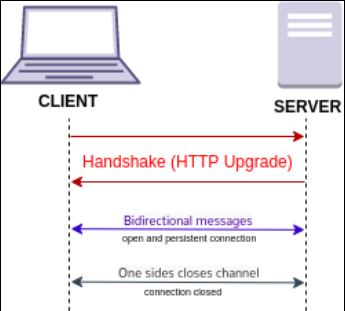

Reference: [What is the fundamental difference between WebSockets and pure TCP?](https://stackoverflow.com/questions/2681267/what-is-the-fundamental-difference-between-websockets-and-pure-tcp?lq=1)

### 5. Bidirectional and full-duplex 
---
Bidirectional means you can send data in both directions.

Full duplex means you can send data in both directions at the same time - you can have two threads, one writing data and one reading data, executing concurrently.

If we take as endpoints "client" and "server" (no matter how many TCP connections between the two), then obviously both HTTP/1.1 and HTTP/2 are full duplex.

This is obvious for HTTP/2 but less known for HTTP/1.1 because it is commonly thought as a "first the request, then the response" protocol - however, that is not the case. It is perfectly possible, for example for a server that echoes back the content bytes that the client sends, to have the client make a large upload, and while the upload is still going the server already starts to respond echoing back the bytes - upload and download happen at the same time.

We can now enter the matter of unsolicited communication from server to client.

This is not possible in HTTP/1.1. Even with Server Sent Events (SSE) the client makes a request and the server responds with an "infinite response" - but the client must make the request first.

In HTTP/1.1, SSE is not full duplex from the point of view of a single TCP connection: the client first makes the request, then the server responds with an "infinite response". From that point on, the client can communicate with the server only by making another request, which means opening a new connection.

In HTTP/2, SSE is full duplex because it would be possible for the client to communicate to the server by making another request on the same TCP connection, **thanks to HTTP/2 multiplexing**.

Unsolicited communication from server to client is also not possible in HTTP/2, because HTTP/2 can "push" a resource to the client, but only in the context of a previous request.

For example, a HTTP/2 client establishes a connection with the server, but then it does not send any request; in this case, the server won't be able to push anything to the client (not even a welcome page), as it needs a previous request to do so.

That is why HTTP/2 cannot be a complete substitute for the WebSocket protocol, which is the only web protocol that you can use for full unsolicited communication from server to client.

Reference: [confusion regarding bidirectional and full-duplex in articles about http/2](https://stackoverflow.com/questions/54940099/confusion-regarding-bidirectional-and-full-duplex-in-articles-about-http-2)

#### 5.1. What is the difference between HTTP/1.1 pipelining and HTTP/2 multiplexing?
**HTTP/1.1 without pipelining:** Each HTTP request over the TCP connection must be responded to before the next request can be made.

**HTTP/1.1 with pipelining:** Each HTTP request over the TCP connection may be made immediately without waiting for the previous request's response to return. The responses will come back in the same order.

**HTTP/2 multiplexing:** Each HTTP request over the TCP connection may be made immediately without waiting for the previous response to come back. The responses may come back in any order.

HTTP/1.1 pipelining still requires the requests to be returned in full, in the **order requested**.

HTTP/2 allows the requests responses to be split into chunks and be returned in an intermingled fashion so avoiding head of line blocking.

**Multiplexing**: to be able to send different signals (here requests) on the same communication link.

A limitation of the HTTP/1 protocol, is that each HTTP connection is only able to handle one request at a time. It means that the only way to parallelize multiple requests is to open several HTTP connections. That is what browsers do. They open multiple connections (6 by remote for most of them), to be able to launch potentially 6 requests at a time to a given remote.

It is not very resource and network efficient. Opening more connections is an overhead for both the client and the server. TLS handshakes must be performed for each connection if you are doing HTTPS, the TCP slow start process must be performed etc.

And what happened if you want to perform more than 6 requests at a given time? You got it, some of your requests are queued, until one of the connection is available to handle it.

That explains the need for multiplexing. One TCP connection to rule them all.

There is one attempt to overcome this issue in HTTP/1.1 which is HTTP pipelining. With pipelining, an HTTP client is able to send to a server multiple requests at once. The problem is that the requested HTTP server has to answer to all these requests, keeping the order in which they were made by the client. This mandatory requirement leads to a performance-limiting phenomenon known as Head-of-line-blocking.

To represent that, imagine that a client sends a request A involving a lot of computing server side, and a very easy to handle request named B. The server, which is able to deal with several requests at once will deal with the request B very quickly, but can’t send the response because it is waiting for the end of the A computation to respect the requests’ order. The slow requests become the limitation of all following requests.

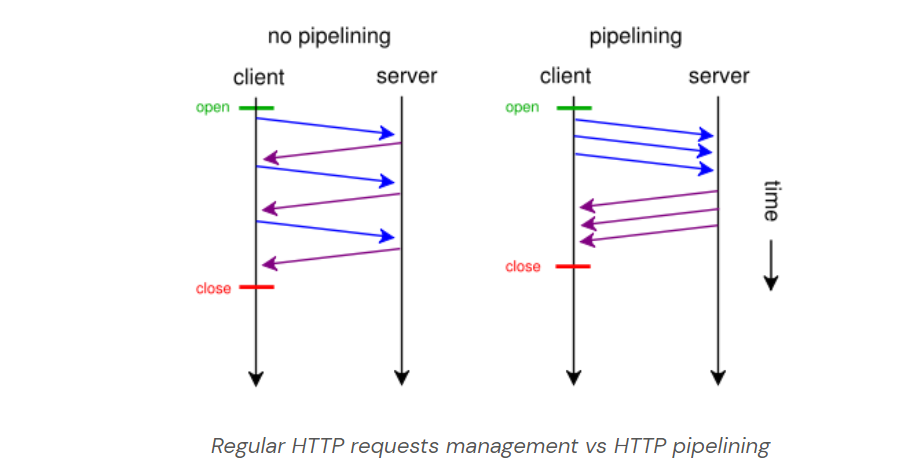

This attempt was unsatisfactory, and so the need for a good multiplexing system on top of HTTP remains.

HTTP/2 enable multiplexing without the issues faced by the HTTP pipelining.

In HTTP/2, each request/response tuple is associated with a unique ID, and is called a stream. When the client sends a request, it gives it an ID, and that ID will be put in the server answer. Therefore, the client knows to which request the answer is, and there is no requirement of respecting the requests’ order like in HTTP pipelining. And therefore, no more Head-of-line-blocking anomaly!

Requests and responses belonging to different streams will flow through this unique HTTP/2 connection at a given time.

Reference:[HTTP/2 Exploration – Part 1: Multiplexing](https://gatling.io/2018/10/http-2-exploration-part-1-multiplexing/)

### 6. Difference between HTTP and WebSocket (HTTP 2.0 )
---
WebSocket is a protocol providing `full-duplex` communication channels over a single TCP connection. Where as, HTTP providing `half-duplex` communication.

Information exchange mode of WebSocket is `bidirectional`. Means, server can push information to the client (which does not allow direct HTTP).

HTTP is request-response protocol. The client sends request. The server waits till the complete request is received. Then sends a response. The client and server cannot send simultaneously.

Full Duplex channel implies that client and server can send data simultaneously. Phone lines are example of Full Duplex. To achieve full duplex in Web, Web sockets is the recommended standard. Once a Web socket connection is established, both parties can exchange messages simultaneously. Web sockets work on top of TCP and does not use the HTTP protocol.

### 7. WebSocket 
---
RFC 6455 states that WebSocket "is designed to work over HTTP ports 443 and 80 as well as to support HTTP proxies and intermediaries", thus making it compatible with HTTP. To achieve compatibility, the WebSocket handshake uses the HTTP Upgrade header to change from the HTTP protocol to the WebSocket protocol.

After the HTTP handshake the Client and Server start speaking WebSocket protocol by exchanging WebSocket envelopes. 

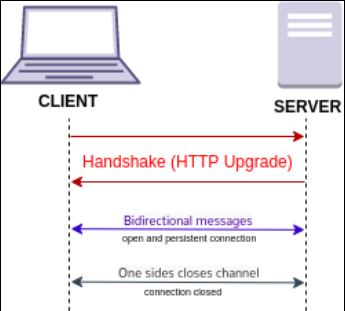

### 8. TLS
---
Transport Layer Security (TLS), the successor(后继者) of the now-deprecated(现在已弃用的) Secure Sockets Layer (SSL), is a cryptographic protocol designed to provide communications security over a computer network. The protocol is widely used in applications such as email, instant messaging, and voice over IP, but its use in securing HTTPS remains the most publicly visible.

The TLS protocol aims primarily to provide privacy and data integrity between two or more communicating computer applications. It runs in the application layer and is itself composed of two layers: the TLS record and the TLS handshake protocols.

> HTTPS, an encrypted HTTP connection established with SSL/TLS.

### 9. HTTP
---
> HTTP a request-response protocol.

HTTP is a stateless protocol. This means that the server doesn’t keep any information about the client after it sends its response, and therefore it can’t recognize that multiple requests from the same client may be related.

想想前阵子开发的AJAX模型，在每次修改或者请求server的数据的时候，都是需要一个Servlet来处理的，也就是每次操作都是需要建立一次HTTP连接的。

Web applications can’t easily provide the kind of immediate feedback typically found in standalone GUI applications such as word processors or traditional client/server applications. Every interaction between the client and the server requires a request/response exchange. Performing a request/response exchange when a user selects an item in a list box or fills out a form element is usually too taxing on the bandwidth available to most Internet users.

#### 9.1. HTTPS
HTTPS, an encrypted HTTP connection established with SSL/TLS.

#### 9.2 A typical HTTP session
Sessions consist of three phases:

+ The client establishes a TCP connection (or the appropriate connection if the transport layer is not TCP).


+ The client sends its request, and waits for the answer.


+ The server processes the request, sending back its answer, providing a status code and appropriate data.

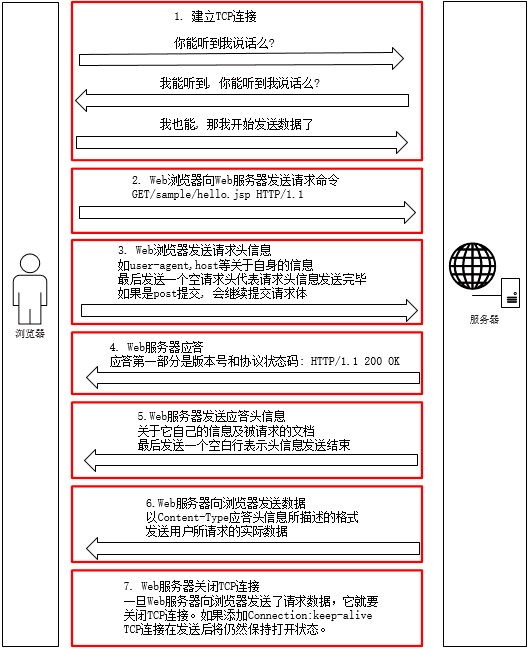

### 10. When to use a HTTP call instead of a WebSocket (or HTTP 2.0)
---
It isn’t always easy to know when it might be better to use HTTP request/responses versus WebSockets for your project, Universal Windows Platform app or not, especially when you’re facing so many other critical decisions for your project/app at the same time. 

One thing you may be wondering is why not HTTP 2.0? HTTP 2.0 connections could be used in place of a WebSocket depending on how they will be used as they have bi-directional messaging abilities, but they must follow the `request/response pattern`. 

#### 10.1. When HTTP Is better
When evaluating whether HTTP is the better choice, you may find it helpful to think in terms of scenarios. And when it comes to scenarios, these are the ones for which you’ll find HTTP is particularly well-suited.

**Retrieve Resource**

A client wants the current state of a resource and does not want or require ongoing updates.Example: A football fan wants to check the result of a game. If the game were from last week, the game result would be stable and additional updates very unlikely. In that case, HTTP would be a sound choice. Not so, however, if the game were currently in progress. For a game in progress, the score will change constantly and updates will be frequent. In that case, a WebSocket would likely be the better choice.

**Highly Cacheable Resource**

Resources benefit from caching when the representation of a resource changes rarely or multiple clients are expected to retrieve the resource. The word “rarely” is intentionally left vague here, because it must be judged against the anticipated client access pattern and not against a fixed amount of time. Highly volatile resources may still be highly cacheable if they are frequently retrieved, especially if by multiple clients.Note that the WebSocket design does not allow explicit or transparent proxies to cache messages, which can degrade client performance.
Example: Football scores from the previous week’s game are highly cacheable because they are stable and unlikely to change, so HTTP would be a good fit. Football scores from a game in progress, however, are likely to change frequently. In that case, the resource is not highly cacheable, so a WebSocket becomes the better fit.

**Idempotency and Safety**

HTTP methods have well-known idempotency and safety properties. A request is “idempotent” if it can be issued multiple times without resulting in unique outcomes. This property enables clients to accommodate timeouts or transient networking issues in a straightforward manner. A request is “safe” if it does not modify the resource being acted upon. This property is the key to enabling caching (or pre-fetching).Safety and idempotency are key enablers for designs that must be resilient to communication failure. HTTP is ideally suited to this scenario because the HTTP methods have broadly shared safety and idempotency expectations. The WebSocket protocol leaves these issues to the messaging layer design (which means there are no broad industry standards).


**Error Scenarios**

HTTP is designed around the request-response messaging pattern, which means it has extensive support for error scenarios. The HTTP design allows for responses to describe errors with the request, with the resource, or to provide nuanced status information to differentiate between success scenarios.The WebSocket protocol offers support only for error scenarios affecting the establishment of the connection. Once the connection is established and messages are exchanged, any additional error scenarios must be addressed in the messaging layer design.


**Synchronized Events**

The request-response pattern is well suited to operations that require synchronization or that must act in a serialized fashion. The HTTP response represents a definitive conclusion to a specific request, allowing subsequent actions to be gated on it. In WebSockets, this detail is left up to the messaging layer design.The WebSocket protocol offers no guarantee a message will be acknowledged in any form. Although, in your design, you should try to avoid assuming that clients will always synchronize their actions perfectly. Do your best to offer a stateless interaction pattern, or allow clients to make requests in parallel, because it will make your application more resilient to unavoidable networking issues or buggy client behavior.


#### 10.2 When a WebSocket is typically better
**Fast Reaction Time**

When a client needs to react quickly to a change (especially one it cannot predict), a WebSocket may be best. Consider a chat application that allows multiple users to chat in real-time. If WebSockets are used, each user can both send and receive messages in real-time. WebSockets allow for a higher amount of efficiency compared to REST because they do not require the HTTP request/response overhead for each message sent and received.


**Ongoing Updates**

When a client wants ongoing updates about the state of the resource, WebSockets are generally a good fit. WebSockets are a particularly good fit when the client cannot anticipate when a change will occur and changes are likely to happen in the short term.HTTP, on the other hand, may be a better fit if the client can predict when changes occur or if they occur infrequently—for example, a resource that changes hourly or changes only after it knows that a related resource is modified. If the client doesn’t know that the related resource is modified (e.g. because some other client modified it, or the service modified it), then WebSockets are better.

> Unsolicited communication from server to client is not possible in HTTP/2, because HTTP/2 can "push" a resource to the client, but only in the context of a **previous request**.

**Ad-hoc Messaging**

The WebSocket protocol is not designed around request-response. Messages may be sent from either end of the connection at any time, and there is no native support for one message to indicate it is related to another. This makes the protocol well suited to “fire and forget” messaging scenarios and poorly suited for transactional requirements. The messaging layer must address your transactional needs if that’s needed in your application.


**High-Frequency Messaging with Small Payloads**

The WebSocket protocol offers a persistent connection to exchange messages. This means that individual messages don’t incur any additional tax to establish the transport. Taxes such as establishing SSL, content negotiation, and exchange of bulky headers are imposed only once when the connection is established. There is virtually no tax per message. On the other hand, while HTTP v1.1 may allow multiple requests to reuse a single connection, there will generally be small timeout periods intended to control resource consumption. Since WebSockets were designed specifically for long-lived connection scenarios, they avoid the overhead of establishing connections and sending HTTP request/response headers, resulting in a significant performance boost.However, this should not be taken to extremes. Avoid using WebSockets if only a small number of messages will be sent or if the messaging is very infrequent. Unless the client must quickly receive or act upon updates, maintaining the open connection may be an unnecessary waste of resources.

#### 10.3. You might be doing it wrong if…
#### You might be using HTTP incorrectly if…

Your design relies on a client polling the service often, without the user taking action.


Your design requires frequent service calls to send small messages.


The client needs to quickly react to a change to a resource, and it cannot predict when the change will occur.


The resulting design is cost-prohibitive. Ask yourself: Is a WebSocket solution substantially less effort to design, implement, test, and operate?

#### You might be using WebSockets incorrectly if:

The connection is used only for a very small number of events, or a very small amount of time, and the client does not need to quickly react to the events.


Your feature requires multiple WebSockets to be open to the same service at once.


Your feature opens a WebSocket, sends messages, then closes it—then repeats the process later.


You’re re-implementing a request/response pattern within the messaging layer.


The resulting design is cost-prohibitive. Ask yourself: Is a HTTP solution substantially less effort to design, implement, test, and operate?

Reference: [When to use a HTTP call instead of a WebSocket (or HTTP 2.0)](https://blogs.windows.com/windowsdeveloper/2016/03/14/when-to-use-a-http-call-instead-of-a-websocket-or-http-2-0/)